In [43]:
import os
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
from PIL import Image
import torch
import torch.nn as nn
class data_load(Dataset):
    def __init__(self,folder_path,transform):
        self.folder_path = folder_path
        self.transform = transform
        self.x , self.y = self.folder_reader()
    def folder_reader(self):
        sub_folder = [sub_folders for sub_folders in os.listdir(self.folder_path) if os.path.isdir(os.path.join(self.folder_path,sub_folders))]
        items = {i:sub_folder[i] for i in range(len(sub_folder)) }
        print(items)
        x = [os.path.join(self.folder_path,sub_folders,image) for sub_folders in sub_folder for image in os.listdir(os.path.join(self.folder_path,sub_folders))]
        y = [i for i in range(len(items)) for file_name in x if file_name.split('/')[-2]==items.get(i)]
        #print(y)
        
        return x , torch.tensor(y,dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self,index):
        img = Image.open(self.x[index])
        if self.transform:
            image = self.transform(img)
        labels = self.y[index]
        return image,labels


transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

data = data_load(folder_path='/kaggle/input/flowerdatasets/flowers/train',transform=transform)
dataloader = DataLoader(data,batch_size=1,num_workers=1,shuffle=True)



{0: 'bluebell', 1: 'fritillary', 2: 'daffodil', 3: 'lily_valley', 4: 'crocus', 5: 'cowslip', 6: 'colts_foot', 7: 'tigerlily', 8: 'dandelion', 9: 'buttercup', 10: 'daisy', 11: 'pansy', 12: 'windflower', 13: 'sunflower', 14: 'tulip', 15: 'snowdrop', 16: 'iris'}


In [28]:

class ConvolutionNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(ConvolutionNN,self).__init__()
        self.con1 = nn.Conv2d(3,6,5)
        self.con2 = nn.Conv2d(6,16,5)
        self.pool = nn.MaxPool2d(2,2)

        self.hid1 = nn.Linear(input_size,hidden_size)
        self.hid2 = nn.Linear(hidden_size,hidden_size)
        self.output = nn.Linear(hidden_size,output_size)

        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.pool(self.relu(self.con1(x)))
        x = self.pool(self.relu(self.con2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.hid1(x))
        x = self.relu(self.hid2(x))
        return self.relu(self.output(x))


model = ConvolutionNN(400,2*400,17)
model

ConvolutionNN(
  (con1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (con2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hid1): Linear(in_features=400, out_features=800, bias=True)
  (hid2): Linear(in_features=800, out_features=800, bias=True)
  (output): Linear(in_features=800, out_features=17, bias=True)
  (relu): ReLU()
)

In [34]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(),lr=0.01)

ephoc=10
for ephocs in range(ephoc):
    for image,label in dataloader:
        optim.zero_grad()
        y_out = model(image)
        err = loss(y_out,label)
        err.backward()
        optim.step()
    print(f"EPHOCS: {ephocs}-- LOSS: {err.item()}")

EPHOCS: 0-- LOSS: 2.8337655067443848
EPHOCS: 1-- LOSS: 2.846247911453247
EPHOCS: 2-- LOSS: 2.384213924407959
EPHOCS: 3-- LOSS: 2.468658685684204
EPHOCS: 4-- LOSS: 1.3327022790908813
EPHOCS: 5-- LOSS: 2.227811574935913
EPHOCS: 6-- LOSS: 2.113611936569214
EPHOCS: 7-- LOSS: 1.5788630247116089
EPHOCS: 8-- LOSS: 2.4617197513580322
EPHOCS: 9-- LOSS: 3.393296718597412


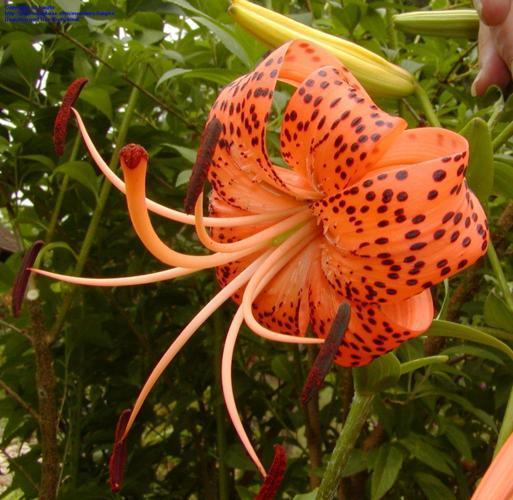

In [48]:
image = Image.open('/kaggle/input/flowerdatasets/flowers/train/tigerlily/image_0493.jpg')
image

In [49]:
image = transform(image).unsqueeze(0)

with torch.no_grad():
    out = model(image)
    _, prediction = torch.max(out,1)
    dictt = {
         0: 'bluebell', 
         1: 'fritillary',
         2: 'daffodil',
         3: 'lily_valley',
         4: 'crocus',
         5: 'cowslip',
         6: 'colts_foot',
         7: 'tigerlily',
         8: 'dandelion',
         9: 'buttercup',
         10: 'daisy',
         11: 'pansy',
         12: 'windflower',
         13: 'sunflower',
         14: 'tulip',
         15: 'snowdrop',
         16: 'iris'
    }
    print(f"Predicted class:  {dictt[prediction.item()]}")

Predicted class:  tigerlily
